In [123]:
import numpy as np

In [124]:
def phi(yss,zss):
    return - yss/(4*np.sqrt(1+zss**2))

def theta_x(yss,zss,theta_z):
    return np.arccos(zss/np.sqrt(1-(np.sin(theta_z))**2*(1+zss**2)))

def theta_y(yss,zss,theta_z):
    return np.sin(theta_z)*np.sqrt(1+zss**2)

In [125]:
b       = 10
gamma_1 = 0.1
gamma_2 = 0.2

Delta   = 2*b**2+gamma_1**2+4*gamma_1*gamma_2
y       = (2*b*gamma_1)/Delta
z       = (gamma_1*(gamma_1+4*gamma_2))/Delta

theta_z = np.pi/3
print("phi = ", phi(y,z))
print("theta_x = ", theta_x(y,z,theta_z))
print("theta_y = ", theta_y(y,z,theta_z))

phi =  -0.00249887525323874
theta_x =  1.5698967312183858
theta_y =  0.8660254913906429


# Qiskit code to find $\rho_{ss}$

In [126]:
from qiskit import*

In [127]:
angle_theta_x = theta_x(y,z,theta_z)
angle_theta_y = theta_y(y,z,theta_z)
angle_theta_z = theta_z
angle_phi = phi(y,z)

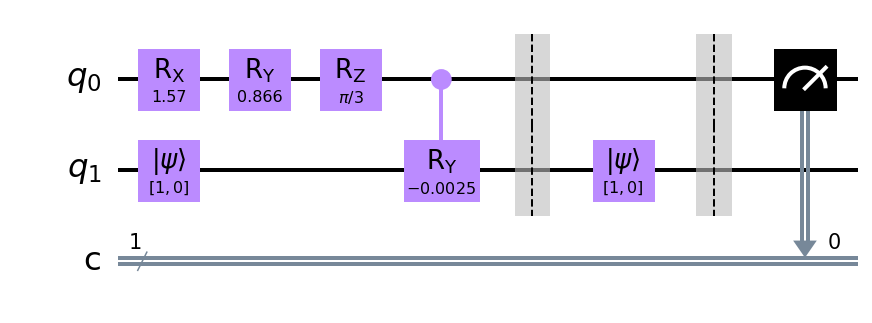

In [128]:
qc = QuantumCircuit(2,1)
qc.initialize([1,0], 1)
qc.rx(angle_theta_x,0)
qc.ry(angle_theta_y,0)
qc.rz(angle_theta_z,0)
qc.cry(angle_phi,0,1)
qc.barrier()
qc.initialize([1,0], 1)
qc.save_statevector()
qc.measure(0,0)
qc.draw("mpl",scale=2)

In [129]:
# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = backend_sim.run(transpile(qc, backend_sim), shots=2048)

# Grab the results from the job.
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)
print(counts)

{'1': 1025, '0': 1023}


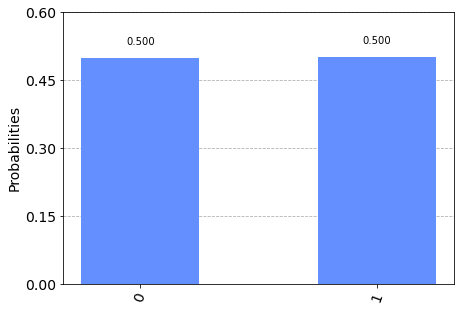

In [130]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [131]:
from qiskit.providers.aer import QasmSimulator
backend = QasmSimulator()
backend_options = {'method': 'statevector'}
job = execute(qc, backend, backend_options=backend_options)
job_result = job.result()
print(job_result.get_statevector(qc)[0])
print(job_result.get_statevector(qc)[1])
print(job_result.get_statevector(qc)[2])
print(job_result.get_statevector(qc)[3])

(0.7043910621907391-0.0642263762831157j)
(0.5778493709380061-0.40718338448651453j)
0j
0j


In [132]:
print(job_result.get_statevector(qc))

Statevector([0.70439106-0.06422638j, 0.57784937-0.40718338j,
             0.        +0.j        , 0.        +0.j        ],
            dims=(2, 2))
